# Statistical Mechanics 
## Final Project: Particles Elastic Collision in 3-D Space
105022555 陳奕丞
<br><br>

#### 研究目的：


模擬粒子在空間中彈性碰撞，達平衡後是否速度分佈會符合 Maxwell-Blotzmann Distribution。


$f(v)=(\frac{m}{2 \pi k T})^{\frac{3}{2}}\ 4\pi{v}^{2}\ e^{\frac{-m v^{2}}{2 k T}}$
<br><br>

#### 研究方法：
以程式模擬，在三維空間中隨機速度分佈 10000 顆質量相等的粒子，再用彈性碰撞的公式，任意選取兩顆粒子，以任意角度模擬碰撞，部分交換速度，重複數次，統計與比較碰撞前後的速度分佈。
<br>
<br>

#### 程式模擬：

In [9]:
%matplotlib inline

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit

In [22]:
# 統計繪製速度大小之 histogram，並以 Maxwell-Boltzmann Distribution 做 curve fitting

def distribution():
    momentum = [np.linalg.norm(v[i]) for i in range(len(v))]
    plt.hist(momentum, bins=100, density=True)
    
    maxwell = stats.maxwell
    params = maxwell.fit(momentum, floc=0)
#     print(params)
    x = np.linspace(0, 2500, 1000)
    plt.title('Velocity Distribution After Collisions')
    plt.xlabel('Magnitude of Velocity')
    plt.ylabel('Probability Density')
    plt.plot(x, maxwell.pdf(x, *params))

彈性碰撞公式

${\textbf{v}_{1}}'=\textbf{v}_{1}-\frac{2m_{2}}{m_{1}+m_{2}}\frac{<\textbf{v}_{1}-\textbf{v}_{2},\textbf{x}_{1}-\textbf{x}_{2}> }{||\textbf{x}_{1}-\textbf{x}_{2}||}(\textbf{x}_{1}-\textbf{x}_2)$

${\textbf{v}_{2}}'=\textbf{v}_{2}-\frac{2m_{1}}{m_{1}+m_{2}}\frac{<\textbf{v}_{2}-\textbf{v}_{1},\textbf{x}_{2}-\textbf{x}_{1}> }{||\textbf{x}_{2}-\textbf{x}_{1}||}(\textbf{x}_{2}-\textbf{x}_1)$

In [12]:
# 定義隨機碰撞

def collision():
    theta = np.random.random()*np.pi
    phi = np.random.random()*np.pi*2
    (i, j) = (np.random.randint(10000), np.random.randint(10000))
#     print(i, j)
    x = np.array([np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)])
    v[i] = v[i] - np.dot(v[i] - v[j], x) * x
    v[j] = v[j] - np.dot(v[j] - v[i], -x) * (-x)

在三維空間中隨機分佈速度給 10000 顆質量相同的粒子

速度大小隨機：$|\textbf{v}|\in [0,1000)$

速度方向任意：$\theta \in [0, \pi),\ \phi \in [0, 2\pi)$

$v_{x} = |\textbf{v}|\ sin\theta\ cos\phi$

$v_{y} = |\textbf{v}|\ sin\theta\ sin\phi$

$v_{z} = |\textbf{v}|\ cos\theta$



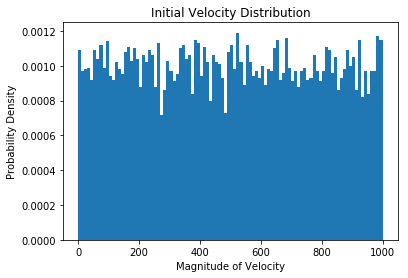

In [47]:
# 隨機產生一萬顆任意速度分佈之粒子

v = []
for i in range(10000):
    v_abs = np.random.random()*1000
    theta = np.random.random()*np.pi
    phi = np.random.random()*np.pi*2
    v_temp = [v_abs * np.sin(theta) * np.cos(phi), v_abs * np.sin(theta) * np.sin(phi), v_abs * np.cos(theta)]
    v.append(v_temp)
    
v = np.array(v)
v_init = np.copy(v)


# 繪製最初速度分佈圖

momentum_init = [np.linalg.norm(v_init[i]) for i in range(len(v))]
plt.title('Initial Velocity Distribution')
plt.xlabel('Magnitude of Velocity')
plt.ylabel('Probability Density')
plt.hist(momentum_init, density=1, bins=100);

<br>

模擬經過**一萬次**的碰撞，繪製 histogram 並做 curve fitting。

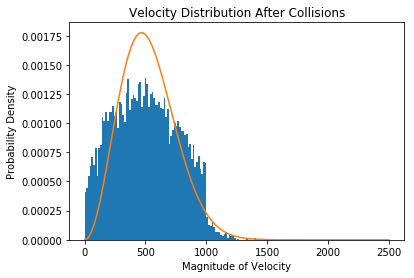

In [48]:
for i in range(10000):
    collision()
    
distribution()

橘線為 Maxwell-Boltzman Distribution 的 fitting curve。

由圖可知，在一萬次碰撞後，速度分佈有所變化，但還不夠接近目標的分佈函數。
<br><br>

再讓粒子碰撞**十萬次**：

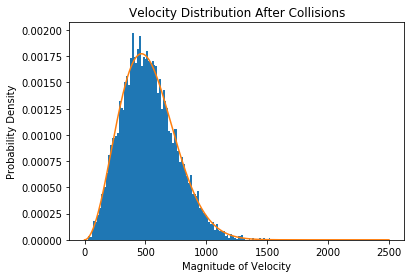

In [50]:
for i in range(100000):
    collision()
    
distribution()

模擬速度分佈幾乎完美符合理論的曲線<br><br>

#### 結論：
最初（碰撞前）與最終（碰撞後）的速度分佈比較如下：


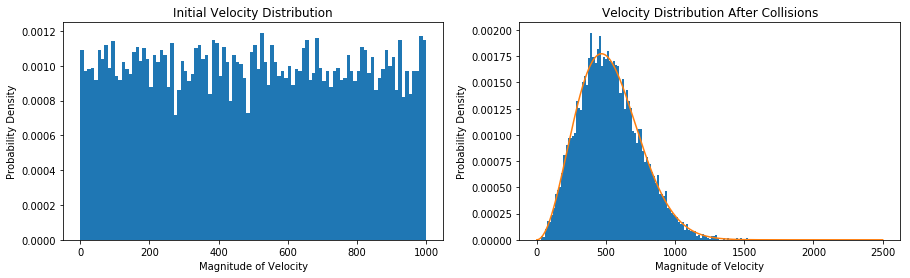

In [51]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 4))
ax0.set(xlabel='Magnitude of Velocity', ylabel='Probability Density',
       title='Initial Velocity Distribution')
ax0.hist(momentum_init, density=1, bins=100)
distribution()

隨機分佈速度的粒子在封閉的三維空間中多次碰撞，達平衡後其速度分佈會符合 Maxwell-Blotzmann Distribution。

模擬結果符合理論。